In [76]:
!pip install plotly

In [77]:
!pip install cufflinks

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from  plotly.offline import iplot
import plotly as py 
import plotly.tools as tls 
import cufflinks as cf 

In [79]:
# import dataset as csv file
pizza = pd.read_csv('pizza_sales.csv', encoding= 'unicode_escape')

In [80]:
pizza.shape

(48620, 12)

In [81]:
pizza.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [82]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [83]:
pd.isnull(pizza).sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [84]:
pizza.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [85]:
pizza.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


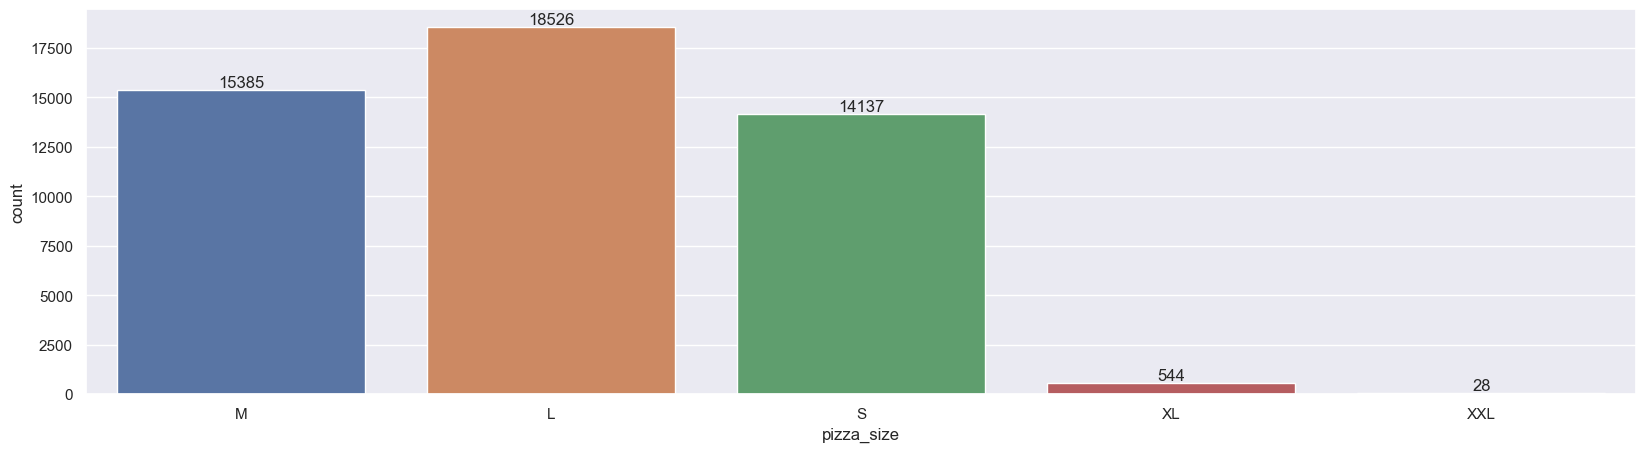

In [86]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'pizza_size',data = pizza)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='pizza_size', ylabel='total_price'>

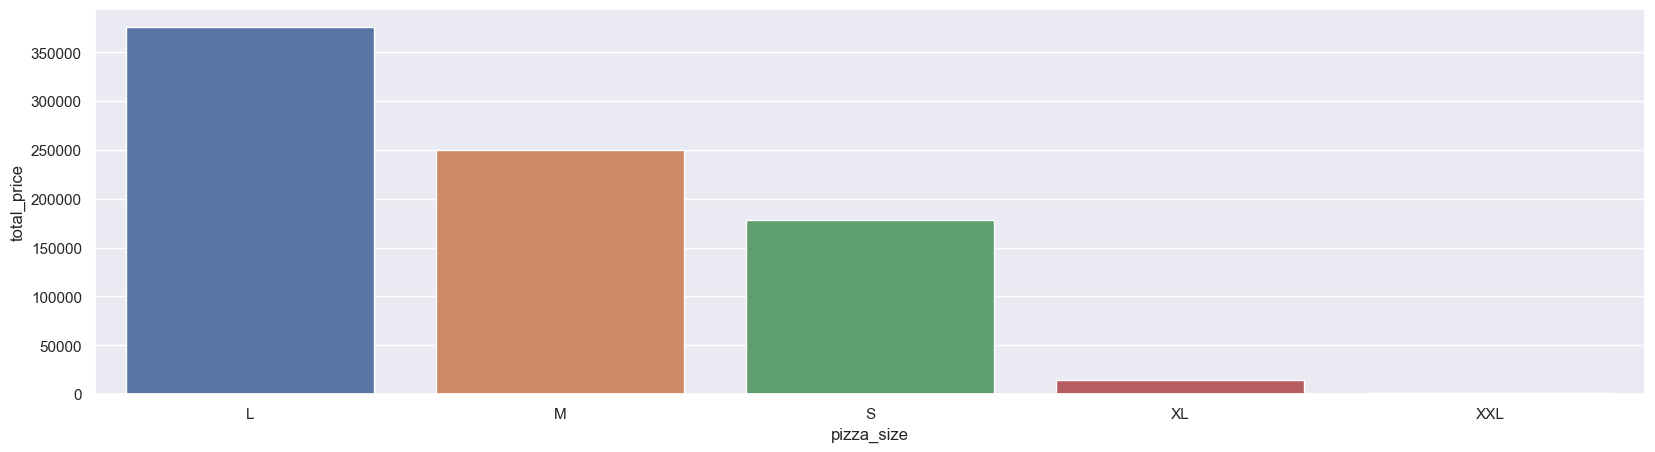

In [87]:
# plotting a bar chart for pizza_size vs total_price

price = pizza.groupby(['pizza_size'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False)

sns.barplot(x = 'pizza_size',y= 'total_price' ,data = price)

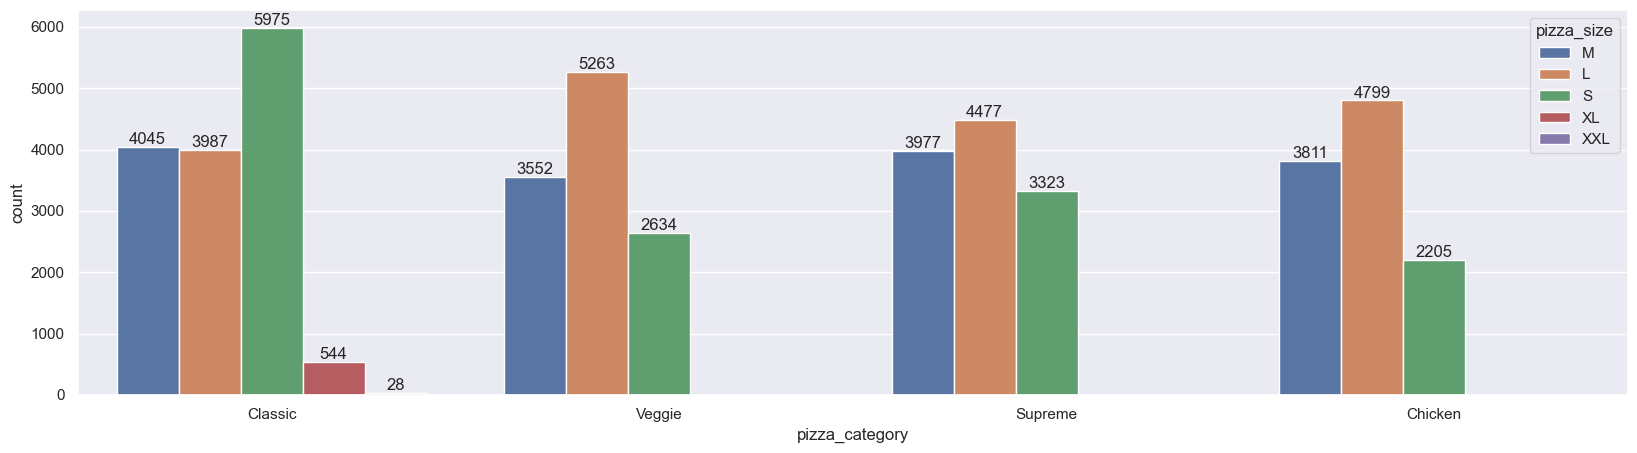

In [88]:
ax = sns.countplot(data = pizza, x = 'pizza_category', hue = 'pizza_size')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='pizza_name', ylabel='total_price'>

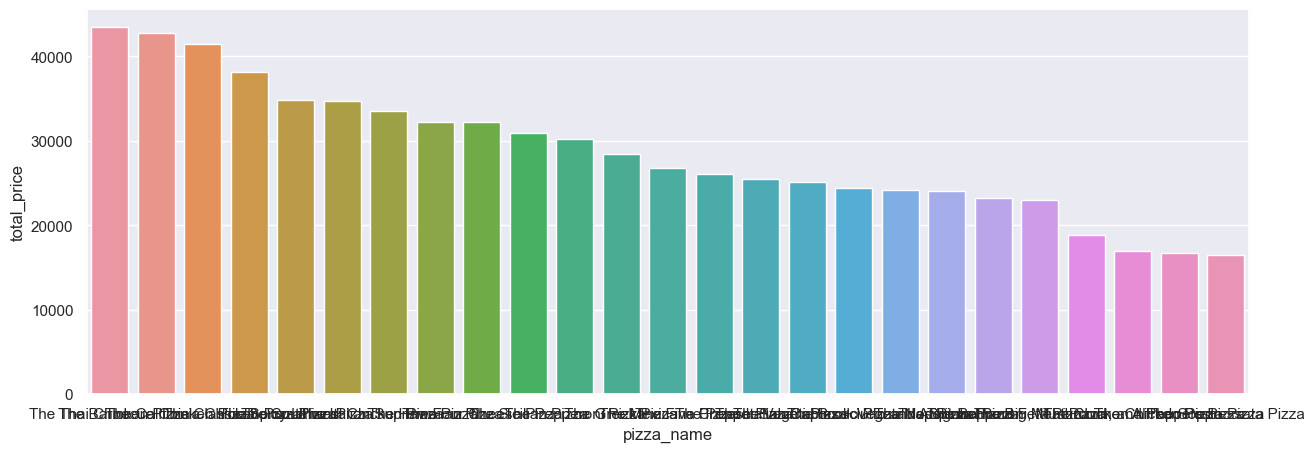

In [89]:
# total amount/sales from top 10 states

sales_pizza_name = pizza.groupby(['pizza_name'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False).head(25)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_pizza_name, x = 'pizza_name',y= 'total_price')

<AxesSubplot:xlabel='pizza_name_id', ylabel='total_price'>

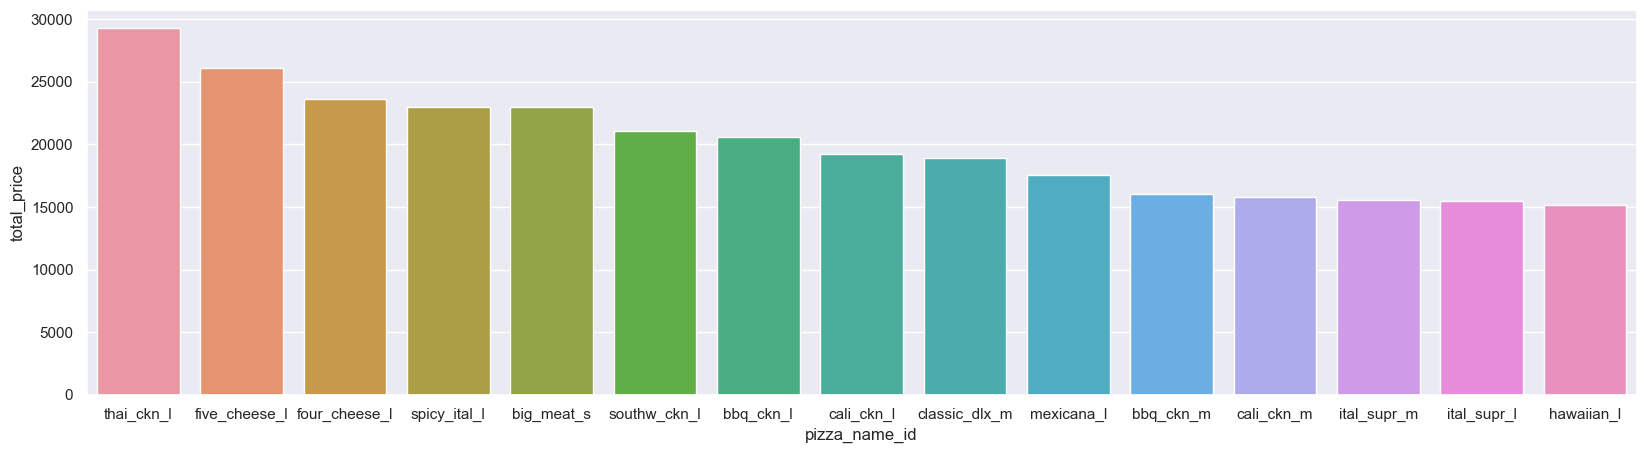

In [90]:
# total price from top 15 pizzas

sales_pizza_name_id = pizza.groupby(['pizza_name_id'], as_index=False)['total_price'].sum().sort_values(by='total_price', ascending=False).head(15)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_pizza_name_id, x = 'pizza_name_id',y= 'total_price')


<Figure size 1000x15000 with 0 Axes>

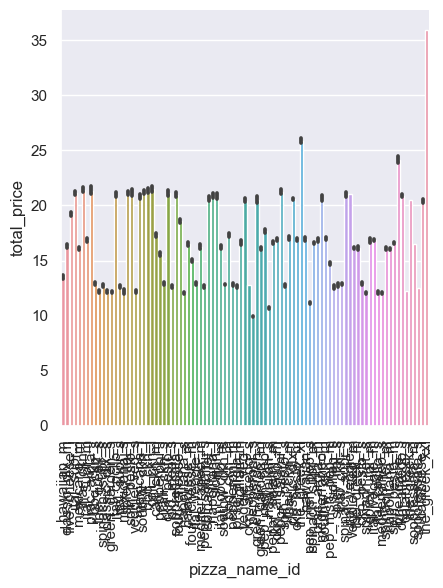

In [91]:
plt.figure(figsize=(10,150))
# Create a plot using Seaborn
sns.catplot(x='pizza_name_id', y='total_price', data=pizza, kind='bar')

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')
sns.set(rc={'figure.figsize':(20,5)})

Text(0.5, 1.0, 'Scatterplot of total price and pizza name')

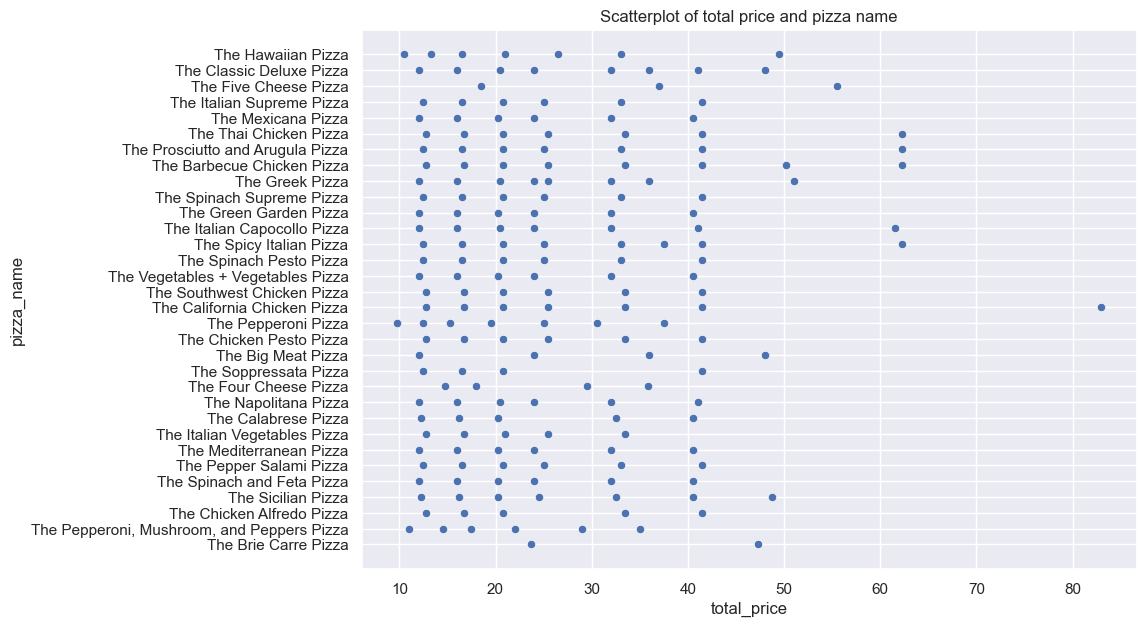

In [92]:
# figure size
plt.figure(figsize=(10,7))

# Simple scatterplot
ax = sns.scatterplot(x='total_price', y='pizza_name', data=pizza)

ax.set_title('Scatterplot of total price and pizza name')

<AxesSubplot:>

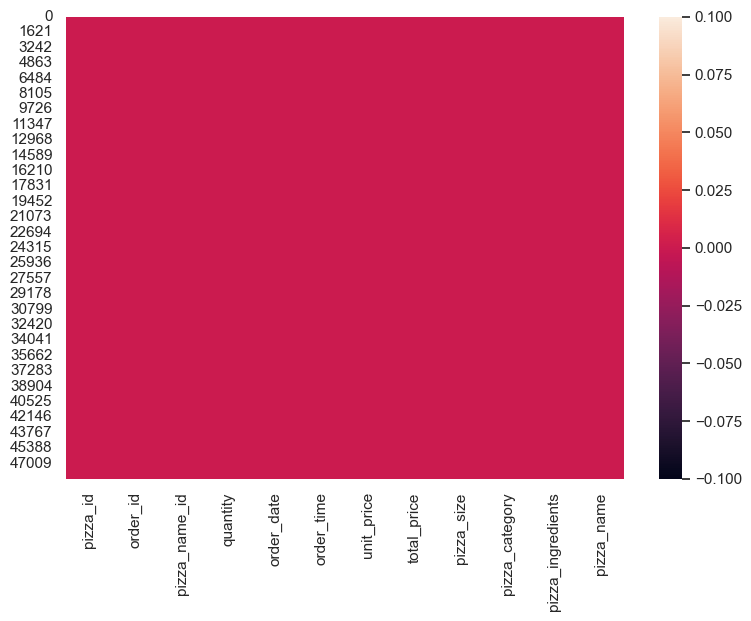

In [96]:
plt.figure(figsize=(9,6))
sns.heatmap(pizza.isnull(), cbar=True)

In [99]:
sns.distplot(numeric_data['quantity'])

NameError: name 'numeric_data' is not defined